In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train),(X_test,y_test) = datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
# def plot_sample(X,y, index):
#   plt.figure(figsize=(15,2))
#   plt.imshow(X[index])
#   plt.xlabel(classes[y[index]])

In [ ]:
# plot_sample(X_train,y_train,0)

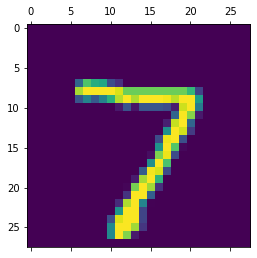

In [ ]:
plt.matshow(X_test[0])

In [ ]:
X_train = X_train /255.0
X_test = X_test / 255.0

In [ ]:
# X_train[0]

In [ ]:
# X_train_flattened = X_train.reshape(len(X_train), 28*28)
# X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
ann = models.Sequential([
                        layers.Flatten(input_shape=(28,28)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='softmax')
])


ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.4982 - accuracy: 0.8803
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2479 - accuracy: 0.9298
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1979 - accuracy: 0.9446
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1661 - accuracy: 0.9536
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1426 - accuracy: 0.9603


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np 
y_pred=ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.94      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.95      0.95      0.95       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test=X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [ ]:
cnn=models.Sequential([
                       layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                       layers.MaxPooling2D((2,2)),

                       layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
                       layers.MaxPooling2D((2,2)),

                       layers.Flatten(),
                       layers.Dense(20, activation='relu'),
                       layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2053 - accuracy: 0.9364
Epoch 2/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0680 - accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0411 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 42s 23m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0337 - accuracy: 0.9896


[0.03371639549732208, 0.9896000027656555]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.2541933e-10, 5.9573324e-10, 9.4227538e-08, 7.0059465e-09,
        3.9431382e-11, 2.2319795e-11, 1.1800426e-14, 9.9999988e-01,
        8.7182384e-10, 5.5340291e-08],
       [2.1853471e-07, 1.6074295e-05, 9.9998367e-01, 9.3033123e-11,
        9.5055599e-09, 4.7779722e-13, 6.3811956e-09, 4.4604636e-09,
        3.0535254e-09, 1.1951688e-13],
       [5.5620387e-12, 9.9999404e-01, 1.1491212e-08, 5.0532384e-11,
        8.6459426e-07, 3.2764341e-08, 2.9252736e-09, 4.9068212e-06,
        1.8707277e-07, 1.0662715e-09],
       [9.9999321e-01, 1.3810243e-11, 8.9880061e-08, 3.3303221e-14,
        2.0208455e-13, 4.2225216e-11, 6.6571829e-06, 1.4238595e-12,
        8.0617529e-10, 8.8102869e-10],
       [1.3189721e-13, 4.2731223e-08, 2.2707838e-09, 4.5185120e-11,
        9.9999058e-01, 2.2245861e-10, 1.4768516e-10, 2.9229282e-08,
        3.6209067e-07, 8.8821598e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
X_train=X_train.reshape(28,28)

ValueError: ignored